<center><h1> TD N°1 : SVM avec sklearn <center><h1>

## Import package

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function


In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [4]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Si besoin
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
#Renommer des colonnes
features_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris.columns = features_names

In [6]:
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]>

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### 2) Statistiques descriptives

In [8]:
#Stat desc
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
#Valeur manquante
iris.isna().sum()
#Nous n'avons pas de valeur manquantes

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#Analyse des corélations
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


#### 3) Recoder variables, si besoin

In [11]:
iris.info()
iris['species'] = iris.species.astype('int32')
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [12]:
#On a retiré l'espèce numéro 2, on peut aussi bien retirer la 1 ou 0
bin_iris = iris[iris.species!=2]

#### 4) Découper data set en train et test

In [13]:
X_train , X_test, y_train, y_test = train_test_split(bin_iris.iloc[:,:4],  
                                                    bin_iris['species'], 
                                                    test_size=0.2 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

In [14]:
y_train.value_counts()

species
1    42
0    38
Name: count, dtype: int64

#### 5) Importer les modules pour la modélisation

In [15]:
#Import Package - copie du cours n°1
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features

In [16]:
#On utilise StandarScaler uniquement sur le X_train pour calculer les moyennes!
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [18]:
#Train model SVC

list_two_col = bin_iris.columns[0:2]

class_svc = SVC(random_state=42, kernel='linear')
class_svc.fit(X_train_sc[:,0:2], y_train)

SVC(kernel='linear', random_state=42)

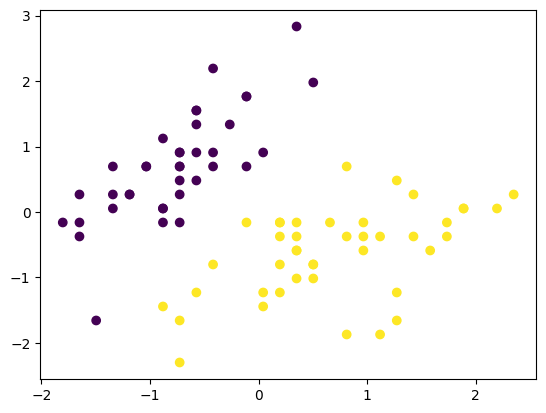

In [19]:
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train)


On peut voir nos deux features qui sont bien distinctes et ne se touche pas, à part un point

### Faire varier le critère de régularisation C

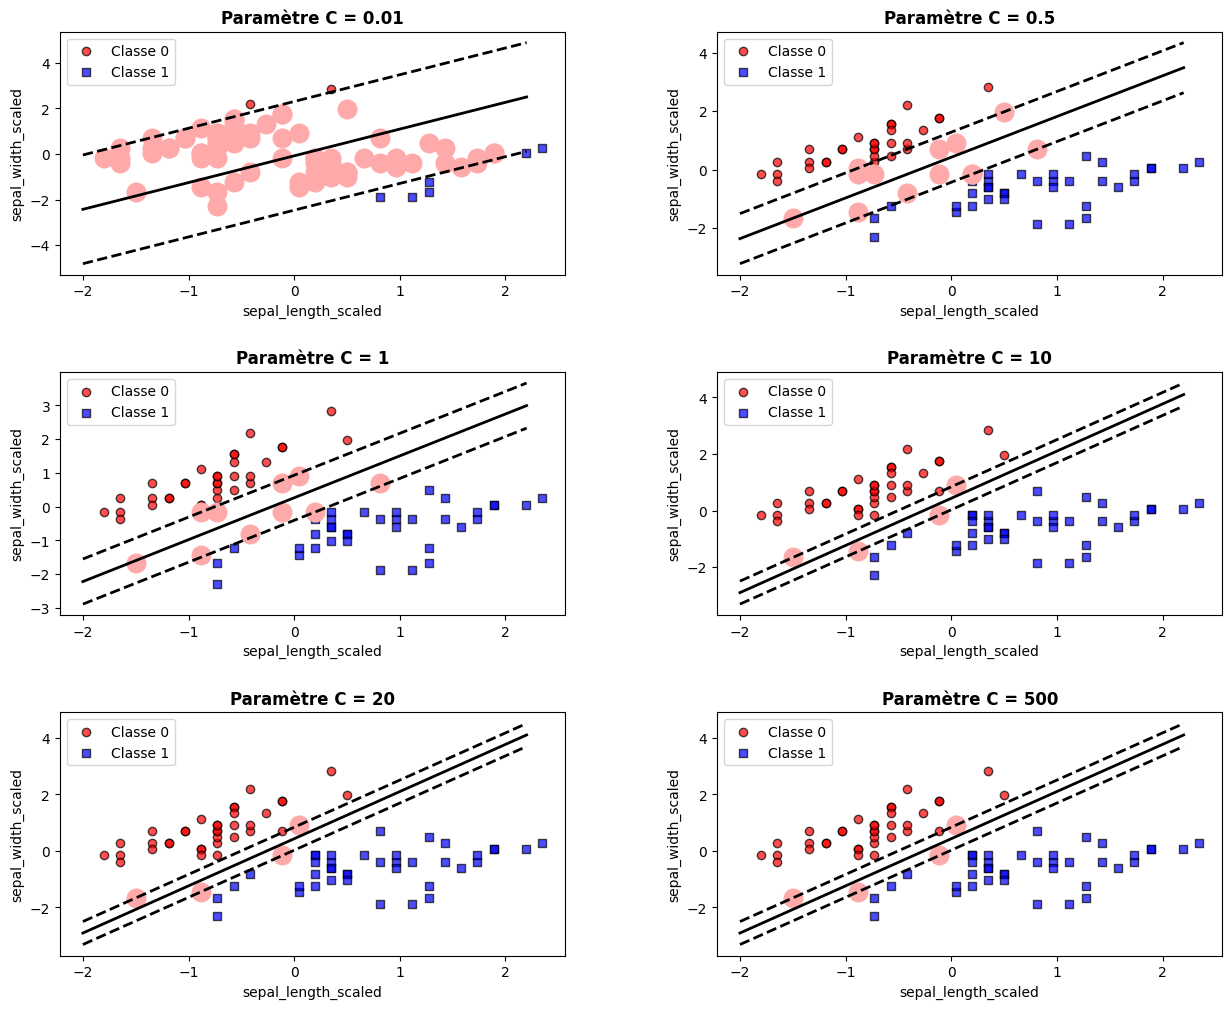

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Paramètre de régularisation
C = [0.01, 0.5, 1, 10, 20, 500]

# Taille de la figure et des sous-graphiques
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# couelurs
colors = ['red', 'blue']
markers = ['o', 's']

for i, c_value in enumerate(C):
    class_svc = SVC(C=c_value, random_state=42, kernel='linear')
    class_svc.fit(X_train_sc[:, :2], y_train)
    ax = plt.subplot(3, 2, i + 1)

    for label in np.unique(y_train):
        plt.scatter(X_train_sc[y_train == label, 0], 
                    X_train_sc[y_train == label, 1], 
                    color=colors[label], 
                    marker=markers[label], 
                    label=f'Classe {label}',
                    alpha=0.7, edgecolors='k')
    
    # fonction du debut
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    
    # Ajout des titres et labels
    plt.title(f'Paramètre C = {c_value}', fontsize=12, fontweight='bold')
    plt.xlabel(f"{list_two_col[0]}_scaled", fontsize=10)
    plt.ylabel(f"{list_two_col[1]}_scaled", fontsize=10)
    plt.legend()

# Affichage de la figure
plt.show()

    



Lorsque nous utilisons un petit paramètre C dans un modèle de classification, cela signifie que le modèle est plus tolérant aux erreurs. Autrement dit, il ne cherche pas à être parfait et est plus flexible quand il rencontre des points qui sont mal classés. Cela peut être utile quand les données sont bruyantes, c'est-à-dire quand il y a des erreurs ou des anomalies dans les données d'entraînement. Cependant, un modèle trop tolérant risque de ne pas bien séparer les différentes catégories, ce qui peut entraîner une mauvaise performance lorsqu'il doit traiter de nouvelles données. C'est ce qu'on appelle un sous-ajustement.

En revanche, si on choisit un grand paramètre C (par exemple, 500), le modèle sera beaucoup plus strict et cherchera à bien classer chaque point. Cela peut l'amener à trop se concentrer sur les données d'entraînement, ce qui peut le rendre très sensible aux petites erreurs ou aux particularités des données. Cela peut entraîner un sur-ajustement : le modèle devient trop spécifique aux données qu'il a vues, et il aura du mal à s'adapter à de nouvelles données, car il aura appris à "imiter" trop précisément les erreurs des données d'entraînement, au lieu de saisir les tendances générales


#### Même principe avec 2 autres features

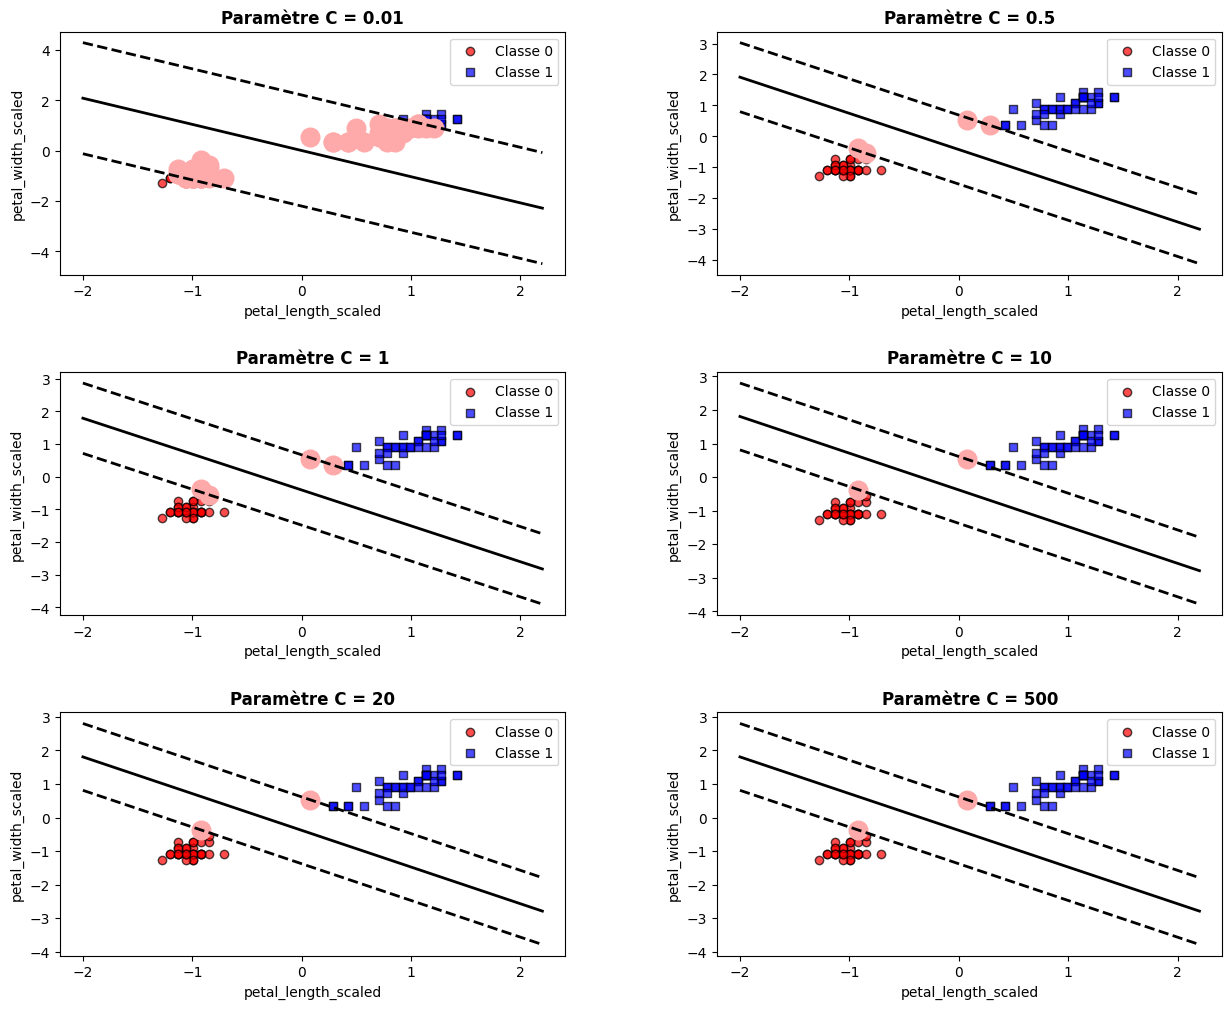

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Les nouveaux features
list_two_col_new = bin_iris.columns[2:4]

# Paramètres de régularisation
C = [0.01, 0.5, 1, 10, 20, 500]

# Taille 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Couleurs
colors = ['red', 'blue']
markers = ['o', 's']

for i, c_value in enumerate(C) : 
    class_svc = SVC(C=c_value, random_state=42, kernel='linear')
    class_svc.fit(X_train_sc[:, 2:4], y_train)
    ax = plt.subplot(3, 2, i + 1)
    for label in np.unique(y_train):
        plt.scatter(X_train_sc[y_train == label, 2], 
                    X_train_sc[y_train == label, 3], 
                    color=colors[label], 
                    marker=markers[label], 
                    label=f'Classe {label}',
                    alpha=0.7, edgecolors='k')
    
    # Tracé des frontières de décision : avec la fonction de au dessus 
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    
    # Ajout des titres et labels
    plt.title(f'Paramètre C = {c_value}', fontsize=12, fontweight='bold')
    plt.xlabel(f"{list_two_col_new[0]}_scaled", fontsize=10)
    plt.ylabel(f"{list_two_col_new[1]}_scaled", fontsize=10)
    plt.legend()

# Affichage de la figure
plt.show()




#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [22]:
#copie de la correction pour récuperer les données 
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/01_SVM/td/data/iris_noise.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

iris_noise = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')
iris_noise['species'] = iris_noise['species'].astype('int32')

#Colnames
features_names = iris_noise.columns[0:4]

In [23]:
#On retire une espèce cette fois la 0
bin_iris_noise = iris_noise[iris_noise.species!=0]

In [24]:
# On refais comme au dessus 
X_train, X_test, y_train , y_test  = train_test_split(bin_iris_noise[features_names], 
                                                      bin_iris_noise['species'], 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      random_state=42
                )

In [25]:
#Scaling features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

c:\Users\lilou\anaconda3\envs\SVM1\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SGDClassifier(random_state=42)

In [27]:
# Get cross_val_score for each function

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

c:\Users\lilou\anaconda3\envs\SVM1\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lilou\anaconda3\envs\SVM1\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lilou\anaconda3\envs\SVM1\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lilou\anaconda3\envs\SVM1\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lilou\anaco

In [28]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']

df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.913043,0.869565,0.772727,0.909091,0.636364,lgr
1,0.869565,0.826087,0.727273,0.863636,0.590909,lsvc
2,0.608696,0.782609,0.636364,0.727273,0.681818,sgdc
3,0.913043,0.826087,0.772727,0.909091,0.772727,svc


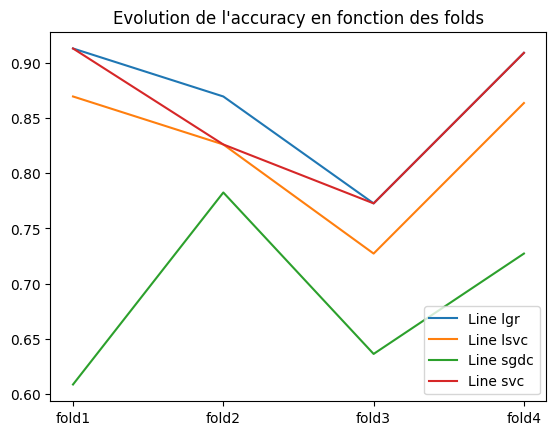

In [29]:
#Evolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [30]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    

str(mean_model)

'0.8387351778656127'

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

##### Choix hyperparamètre
Ici nous allons tuner les paramètres vu en cours

- kernel ==> 'linear'
- C ==> Paramètre de tolérance/régularistion

In [38]:
params = {
    "kernel" : ["linear",'poly'],
    "C" : [0.5, 1, 10, 50,100,1000]
        }

c_svc = SVC(random_state=42)

In [39]:
grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)

In [40]:
take_grid = grid_c_svc.fit(X_train_sc, y_train)

In [41]:
take_grid.cv_results_

{'mean_fit_time': array([0.00162745, 0.0032937 , 0.00257697, 0.00120597, 0.00122309,
        0.00246658, 0.00342908, 0.00082741, 0.00743823, 0.00328927,
        0.06861548, 0.00775986]),
 'std_fit_time': array([0.00153518, 0.00105162, 0.0034165 , 0.00098467, 0.00244617,
        0.00305826, 0.00359076, 0.00165482, 0.00379759, 0.00318657,
        0.04370278, 0.00302537]),
 'mean_score_time': array([0.        , 0.00036469, 0.0003499 , 0.        , 0.        ,
        0.00061445, 0.00153356, 0.00336008, 0.        , 0.        ,
        0.00040431, 0.002808  ]),
 'std_score_time': array([0.        , 0.00072937, 0.00069981, 0.        , 0.        ,
        0.0012289 , 0.00306711, 0.00312497, 0.        , 0.        ,
        0.00080862, 0.00332665]),
 'param_C': masked_array(data=[0.5, 0.5, 1, 1, 10, 10, 50, 50, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dt

In [55]:
str(take_grid.best_score_)

'0.8387351778656127'

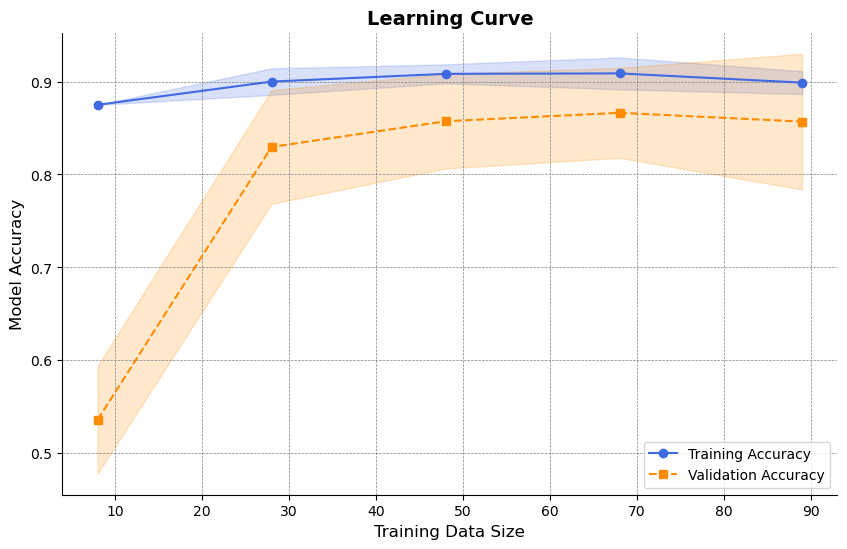

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=c_svc, 
    X=X_train_sc, 
    y=y_train,
    cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calcul des moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Création du tracé
plt.figure(figsize=(10, 6))

# Courbe d'apprentissage sur l'ensemble d'entraînement
plt.plot(train_sizes, train_mean, color='royalblue', marker='o', markersize=6, linestyle='-', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='royalblue')

# Courbe d'apprentissage sur l'ensemble de validation
plt.plot(train_sizes, test_mean, color='darkorange', marker='s', markersize=6, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='darkorange')

# Personnalisation du graphique
plt.title('Learning Curve', fontsize=14, fontweight='bold')
plt.xlabel('Training Data Size', fontsize=12)
plt.ylabel('Model Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.show()


#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [58]:

okm_params = take_grid.best_params_

# Train the model with the best parameters
best_svc = SVC(C=okm_params['C'], kernel=okm_params['kernel'], random_state=42)
best_svc.fit(X_train_sc, y_train)

SVC(C=0.5, kernel='linear', random_state=42)

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [ ]:

# Prédictions sur les données de test
y_pred = best_svc.predict(X_test_sc)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion:')
print(conf_matrix)

# Rapport de classification
class_report = classification_report(y_test, y_pred)
print('Rapport de classification:')
print(class_report)


Accuracy: 0.79
Matrice de confusion:
[[13  3]
 [ 3  9]]
Rapport de classification:
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        16
           2       0.75      0.75      0.75        12

    accuracy                           0.79        28
   macro avg       0.78      0.78      0.78        28
weighted avg       0.79      0.79      0.79        28



#### Influence de vos features sur le modèle

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [61]:
sk_iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=list(features_names)+['species'] )
iris['species']=iris.species.astype('int32')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(iris[features_names],  
                                                    iris['species'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

In [63]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèle faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Teste modélisation

In [64]:
# Entraîner le modèle SVM
model_svc = SVC(kernel='linear', C=1, random_state=42)
model_svc.fit(X_train_sc, y_train)

# Prédire les labels pour les données de test
y_pred_test = model_svc.predict(X_test_sc)

# Évaluer les performances du modèle
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print(f'Accuracy: {accuracy_test:.2f}')
print('Matrice de confusion:')
print(conf_matrix_test)
print('Rapport de classification:')
print(class_report_test)

Accuracy: 0.97
Matrice de confusion:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:

ovo = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovo')
ovr = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovr')

OVO = OneVsOneClassifier(ovo)
OVR = OneVsRestClassifier(ovr)

In [67]:
#Fit the model
OVO.fit(X_train_sc, y_train)
OVR.fit(X_train_sc, y_train)


OneVsRestClassifier(estimator=SVC(C=1, kernel='linear', random_state=42))

#### OVO stratégie

#### OVR stratégie

In [ ]:

confusion_matrix(OVR.predict(X_test_sc), y_test)


array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]], dtype=int64)

3) Existe-t-il des différences entre OVO et OVR?

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>